In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first few rows to understand the data structure
print(data.head())

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Split features and target variable
X = data_encoded.drop('price', axis=1)  # Features
y = data_encoded['price']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [45]:

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2 Score): {r2}")

Model Performance:
Mean Absolute Error (MAE): 902975.6419842101
Mean Squared Error (MSE): 1506230725917.455
Root Mean Squared Error (RMSE): 1227285.9185688782
R-Squared (R2 Score): 0.6754968085161095


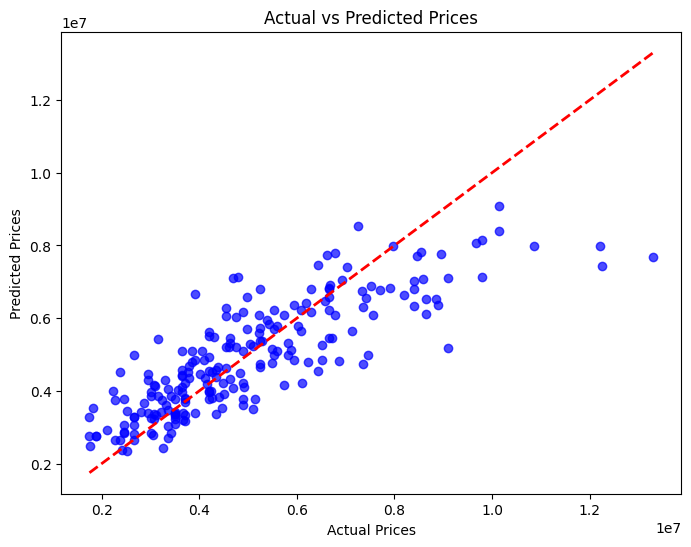

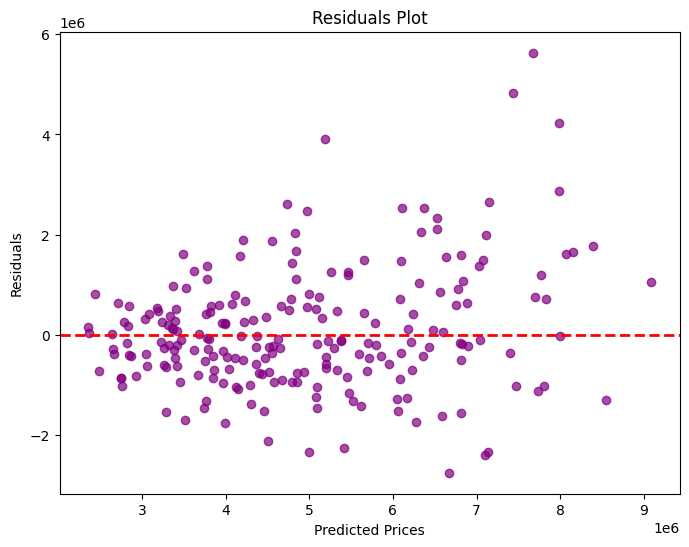

In [46]:
# Plot actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()



In [50]:
# Prompt the user to enter feature values for prediction
area = int(input("Enter the area (in square feet): "))
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))
mainroad = input("Is the house on the main road? (yes/no): ").strip().lower()
guestroom = input("Does the house have a guestroom? (yes/no): ").strip().lower()
basement = input("Does the house have a basement? (yes/no): ").strip().lower()
hotwaterheating = input("Does the house have hot water heating? (yes/no): ").strip().lower()
airconditioning = input("Does the house have air conditioning? (yes/no): ").strip().lower()
parking = int(input("Enter the number of parking spaces: "))
prefarea = input("Is the house in a preferred area? (yes/no): ").strip().lower()
furnishingstatus = input("Enter the furnishing status (furnished/semi-furnished/unfurnished): ").strip().lower()

# Prepare the input data for prediction
new_data = {
    "area": area,
    "bedrooms": bedrooms,
    "bathrooms": bathrooms,
    "stories": stories,
    "mainroad": mainroad,
    "guestroom": guestroom,
    "basement": basement,
    "hotwaterheating": hotwaterheating,
    "airconditioning": airconditioning,
    "parking": parking,
    "prefarea": prefarea,
    "furnishingstatus": furnishingstatus
}

# Convert to DataFrame
input_df = pd.DataFrame([new_data])

# Align columns with the training data (using pd.get_dummies)
input_df_encoded = pd.get_dummies(input_df, drop_first=True)

# Ensure input_df_encoded has the same columns as the training data
missing_cols = set(X_train.columns) - set(input_df_encoded.columns)
for col in missing_cols:
    input_df_encoded[col] = 0  # Add missing columns with default value 0

# Align the column order
input_df_encoded = input_df_encoded[X_train.columns]

# Make the prediction
predicted_price = model.predict(input_df_encoded)
print(f"The predicted price for the provided data is: {predicted_price}")


The predicted price for the provided data is: [5836188.60913755]
